In [1]:
from spotXAI import spotXAI
from spotXAI import boxplot_attribution, scatter_attribution

from spotpython.data.diabetes import Diabetes
from spotpython.light.regression.netlightregression import NetLightRegression
from spotpython.utils.classes import get_removed_attributes_and_base_net

from torch.nn import ReLU
import torch

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
seed = 121315
torch.manual_seed(seed)
np.random.seed(seed)

### Exemplary dictionary with the HP config for a network

In [4]:
example_config = {
    "l1": 64,
    "epochs": 1024,
    "batch_size": 32,
    "act_fn": ReLU(),
    "optimizer": "AdamW",
    "dropout_prob": 0.04938229888019609,
    "lr_mult": 2.3689895017756495,
    "patience": 64,
    "initialization": "Default",
}

### Building the spot Lightning Architecture

In [5]:
model = NetLightRegression(**example_config, _L_in=10, _L_out=1, _torchmetric="mean_squared_error")

#### Usage of `get_removed_attributes_and_base_net` to transform the Lightning module to a plain pyTorch module

Hint: The remaining training attributes will be later used for the analyzer. This dictionary includes parameters that are relevant for the training of the model like batch size, epochs, optimizer or loss function

In [6]:
removed_attributes, torch_net = get_removed_attributes_and_base_net(net=model)
removed_attributes

{'_current_fx_name': None,
 '_example_input_array': tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0

In [7]:
torch_net

NetLightRegression(
  (layers): Sequential(
    (0): Linear(in_features=10, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.04938229888019609, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.04938229888019609, inplace=False)
    (6): Linear(in_features=32, out_features=32, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.04938229888019609, inplace=False)
    (9): Linear(in_features=32, out_features=16, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.04938229888019609, inplace=False)
    (12): Linear(in_features=16, out_features=1, bias=True)
  )
)

### Select a data set

In [8]:
dataset = Diabetes(target_type=torch.float)

### Define the analyzer by handing over the generated model, the data set, a train split ratio and the dictionary consisting of the "removed attributes"


In [9]:
analyzer = spotXAI(model=torch_net, data=dataset, train_split=0.6, training_attributes=removed_attributes, seed=seed)

#### Train the weights of the model

In [10]:
analyzer.train_model()

#### Perform the attribution analysis

In [11]:
baseline = torch.Tensor([[0.1,0.1,0.1,0.2,0.1,0.1,0.1,0.2,0.1, 0.2]])
df = analyzer.get_n_most_sig_features(n_rel=10, attr_method="KernelShap",baseline=baseline, abs_attr=True)

tensor([[ -27.5701,  -23.0066,  -20.5695,   59.8592,  204.9347,  -91.6707,
          -79.7258, -283.5619,  -45.6114, -141.5970]])
tensor([[ -91.0566,   64.2025,  -44.9860,  -15.7973,  145.6243,  -65.9441,
          -41.3549, -159.3731,  -64.6856, -147.8585]])
tensor([[  -9.2275,   61.5066, -144.0667,  -54.0361,  116.7417, -105.2301,
           39.2227, -171.5446, -187.7245,  -70.4049]])
tensor([[-119.3260,   58.0826,  -21.2526,  -49.5971,  279.9130, -251.9384,
          -17.4846, -173.3755,  -99.5084,  -36.6297]])
tensor([[ -96.0914,   22.0148,   26.1709,   28.4213,  154.1216, -199.6075,
         -112.2010, -257.3235,  -26.2115,  -55.0040]])
tensor([[  -7.3049,  -40.0175,  -61.5900,   10.8321,  218.8996,  -89.2306,
         -103.4206, -191.6973,  -22.6554, -132.3815]])
tensor([[  19.5784,   54.4564,   -7.7628,   60.4813,  171.6765, -167.4719,
          -69.1908, -258.0247,  -98.5230,  -74.3462]])
tensor([[ -84.4802,   42.7807,  -17.3912,  -28.6079,  133.0215,  -84.7615,
          -18.0

In [12]:
df

,Feature Index,KernelShapAttribution
0,7,-29609.177734
1,4,23807.529297
2,9,-18904.945312
3,8,-16054.524414
4,5,-15846.567383
5,0,-9587.888672
6,2,-6930.175781
7,6,-6474.799805
8,1,5134.488770
9,3,-5103.077148


#### Plot the results

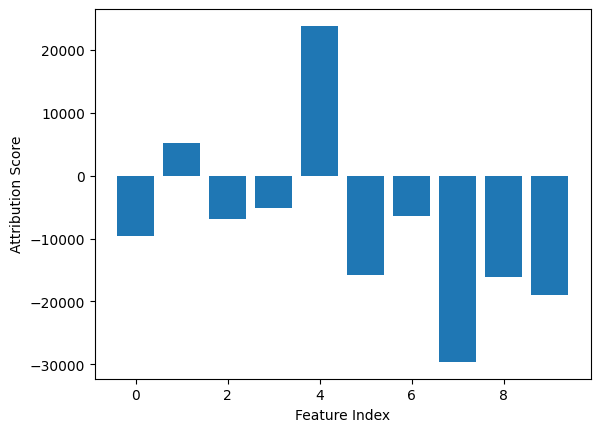

In [13]:
plt.bar(df["Feature Index"], df["KernelShapAttribution"])
plt.xlabel("Feature Index")
plt.ylabel("Attribution Score")
plt.show()

### Perform layer conductance analysis

In [14]:
lc_val = analyzer.get_layer_conductance(layer_idx=12)

Conductance analysis for layer:  Linear(in_features=16, out_features=1, bias=True)


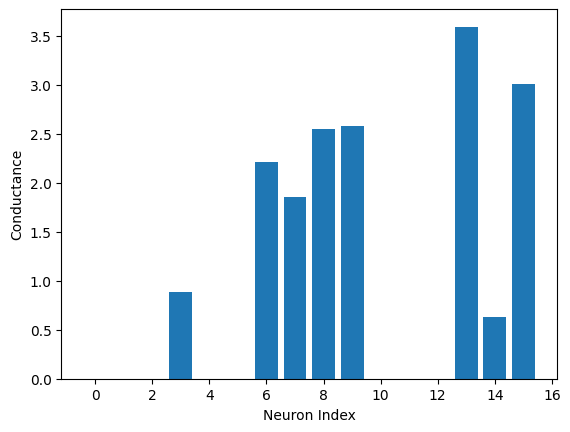

In [15]:
plt.bar(range(len(lc_val)), lc_val)
plt.xlabel("Neuron Index")
plt.ylabel("Conductance")
plt.show()

### Check the distribution of all attribution values

In [16]:
df_attribution_distribution = analyzer.get_attribution_distribution(attr_method="FeatureAblation", abs_attr= False)

In [17]:
import pandas as pd
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.expand_frame_repr', False)
df_attribution_distribution

,attribution value,feature index,corresponding y_value
0,4.311707,0,237.0
1,23.367569,1,237.0
2,17.709320,2,237.0
3,6.011932,3,237.0
4,-32.167389,4,237.0
...,...,...,...
1755,18.756958,5,84.0
1756,-65.871422,6,84.0
1757,2.612381,7,84.0
1758,-13.930809,8,84.0


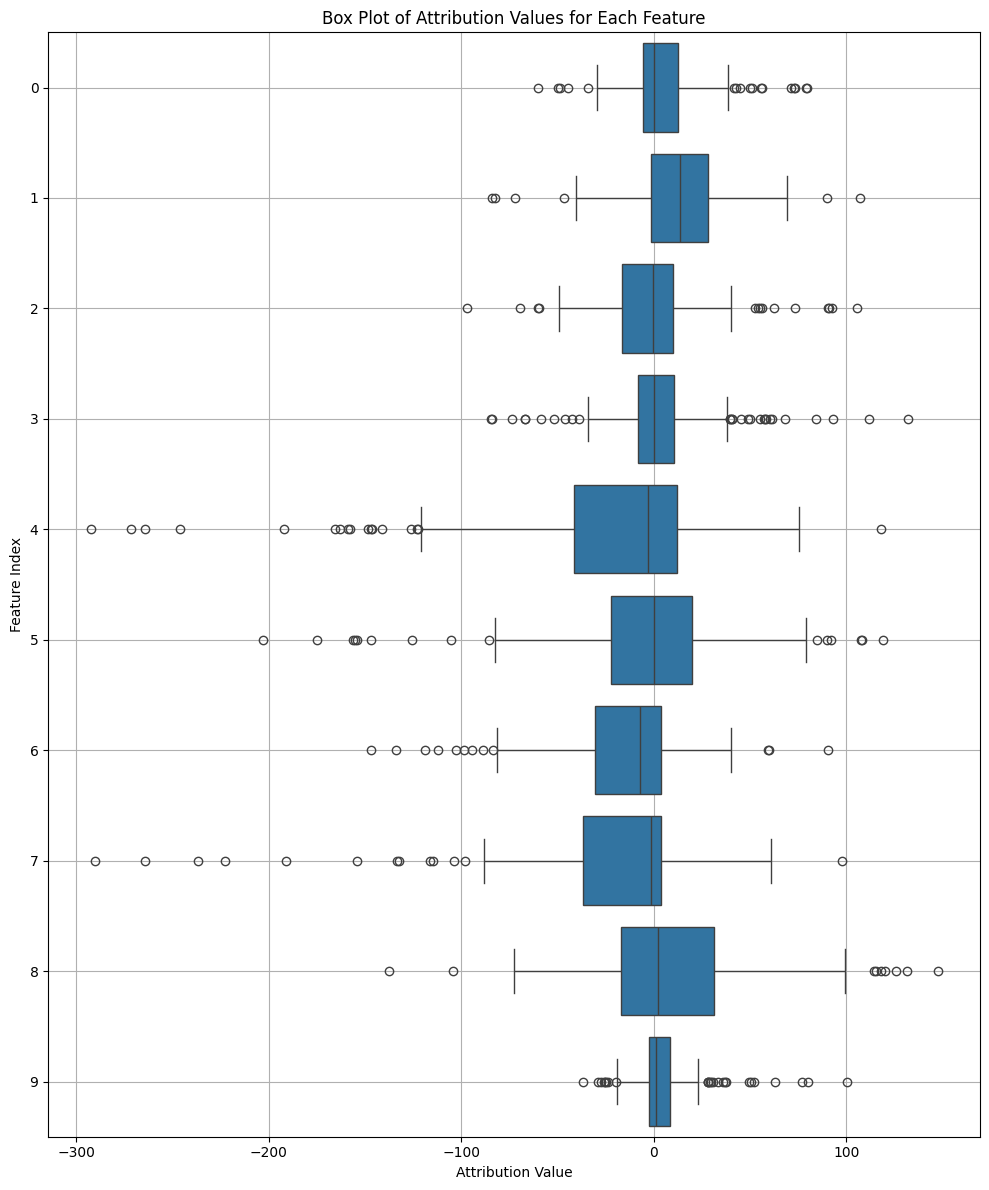

In [18]:
boxplot_attribution(df_attribution_distribution, size = (10,12), attr_filter=None)

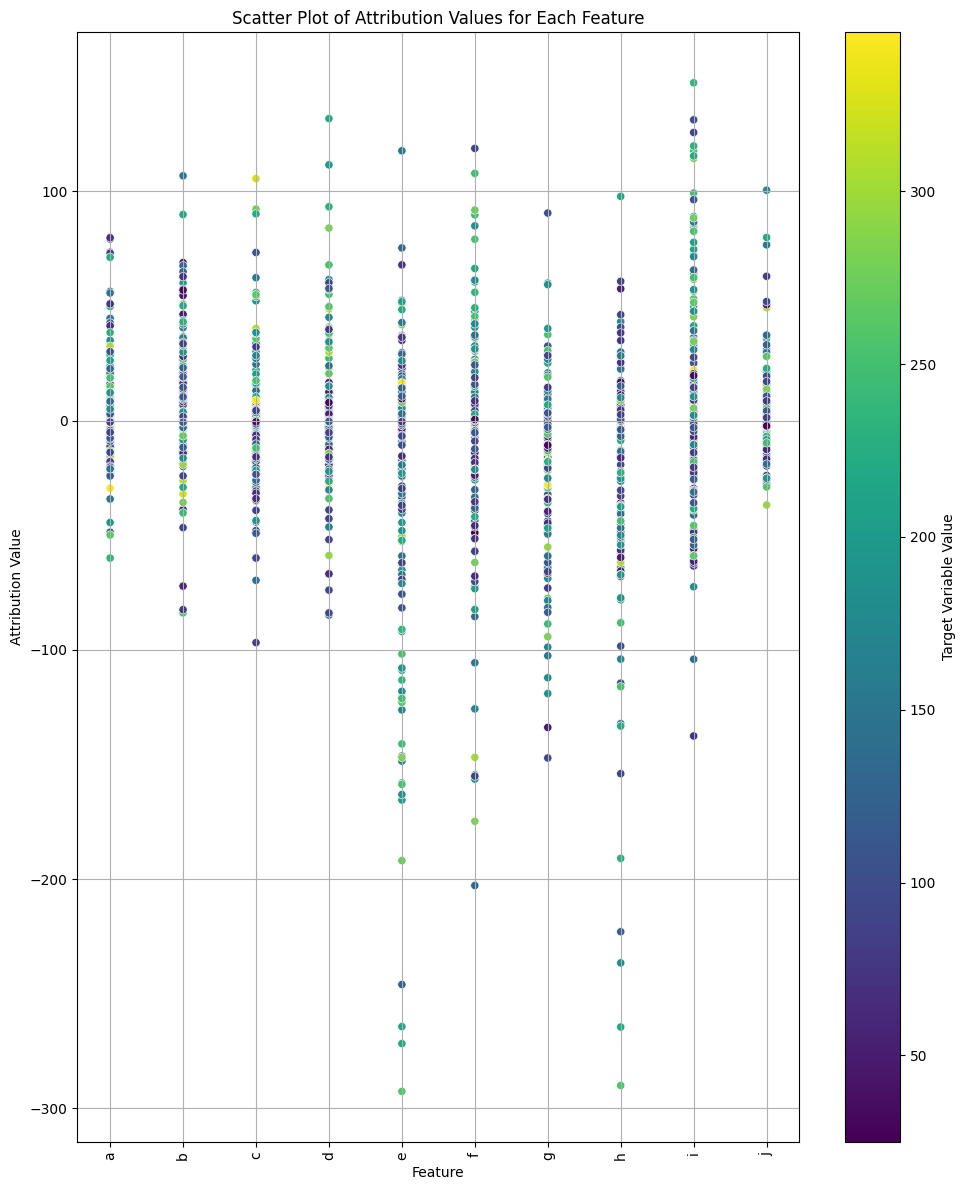

In [19]:
list = ["a","b","c","d","e","f","g","h","i","j"]
scatter_attribution(df_attribution_distribution, size = (10,12), attr_filter=None, param_list=list)